## Assignement 3 - Iris data and Heart Disease Prediction

### Student Name : Ramya Chandran
### Student Number : 8895789

### Part A

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

Figure out if any preprocessing such as scaling would help here

Draw elbow plot and from that figure out optimal value of k

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
# Load the Iris dataset
iris_data = load_iris()
# Drop the column sepal length (cm)','sepal width (cm)
X = iris_data.data[:, 2:4]  


In [46]:
# Drop the column sepal length (cm)','sepal width (cm)
X = iris_data.data[:, 2:4]  

In [47]:
# Preprocessing: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Perform K-means clustering for different values of K
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

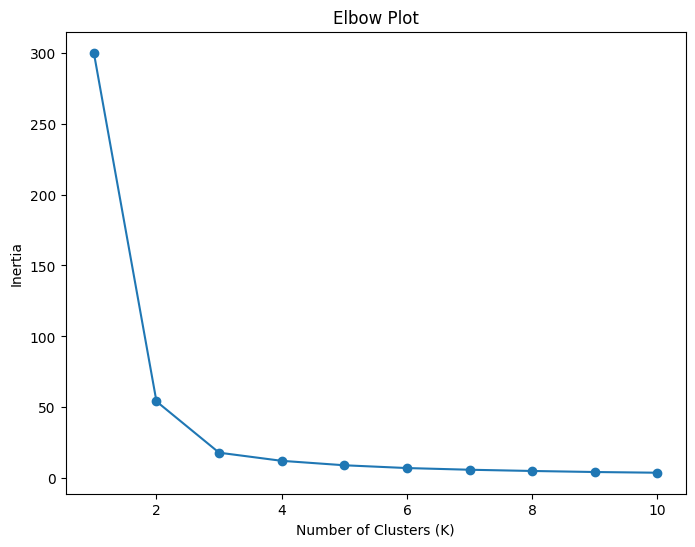

In [6]:
# Draw the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

### Part B

Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction

Load heart disease dataset in pandas dataframe

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

Convert text columns to numbers using label encoding / one hot encoding

Apply scaling

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.



In [49]:
# Loading the dataset
heart_data = pd.read_csv('/Users/ramyachandran/Documents/AI_Algo/CSCN8000-lab-submissions/practical_labs/heart.csv')
heart_data.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [51]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
# Checking for and dropping duplicates
(heart_data.drop_duplicates()).shape

(918, 12)

In [27]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [54]:
# Columns for which outliers need to be removed (numerical columns only)
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Function to remove outliers using Z-score
def remove_outliers_zscore(heart_data, columns, threshold=3):
    for column in columns:
        z_scores = (heart_data[column] - heart_data[column].mean()) / heart_data[column].std()
        heart_data = heart_data[abs(z_scores) < threshold]
    return heart_data

# Remove outliers using different methods
df_zscore = remove_outliers_zscore(heart_data, numerical_columns)

# Let's check the shape of the dataframes after removing outliers using different methods
print("Original Shape:", heart_data.shape)
print("Shape after Z-score method:", df_zscore.shape)

Original Shape: (918, 12)
Shape after Z-score method: (899, 12)


Convert text columns to numbers using label encoding / one hot encoding

In [55]:
# Text columns for encoding
text_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Label encoding
for column in text_columns:
    heart_data[column] = heart_data[column].astype('category').cat.codes

# One-hot encoding
df_encoded = pd.get_dummies(heart_data, columns=text_columns)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head(3))

Encoded DataFrame:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease   
0   40        140          289          0    172      0.0             0  \
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   

   Sex_0  Sex_1  ChestPainType_0  ...  ChestPainType_2  ChestPainType_3   
0  False   True            False  ...            False            False  \
1   True  False            False  ...             True            False   
2  False   True            False  ...            False            False   

   RestingECG_0  RestingECG_1  RestingECG_2  ExerciseAngina_0   
0         False          True         False              True  \
1         False          True         False              True   
2         False         False          True              True   

   ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0             False       False       False        True  
1 

Apply scaling 

In [56]:
# Numerical columns for scaling
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[numerical_columns] = min_max_scaler.fit_transform(df_encoded[numerical_columns])

# Standardization
standard_scaler = StandardScaler()
df_encoded[numerical_columns] = standard_scaler.fit_transform(df_encoded[numerical_columns])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_encoded.head(3))

Scaled DataFrame:
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak   
0 -1.433140   0.410909     0.825070          0  1.382928 -0.832432  \
1 -0.478484   1.491752    -0.171961          0  0.754157  0.105664   
2 -1.751359  -0.129513     0.770188          0 -1.525138 -0.832432   

   HeartDisease  Sex_0  Sex_1  ChestPainType_0  ...  ChestPainType_2   
0             0  False   True            False  ...            False  \
1             1   True  False            False  ...             True   
2             0  False   True            False  ...            False   

   ChestPainType_3  RestingECG_0  RestingECG_1  RestingECG_2   
0            False         False          True         False  \
1            False         False          True         False   
2            False         False         False          True   

   ExerciseAngina_0  ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0              True             False       False       False        True  
1  

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [57]:

# Split the data into features (X) and target (y)
X = df_encoded.drop('HeartDisease', axis=1)  # Replace 'target_column' with the actual target column name
y = df_encoded['HeartDisease']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and evaluate classification models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}')

SVM - Accuracy: 0.89
Logistic Regression - Accuracy: 0.85
Random Forest - Accuracy: 0.88


Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [58]:

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Choose the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Build and evaluate classification models after PCA
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} with PCA - Accuracy: {accuracy:.2f}')

SVM with PCA - Accuracy: 0.84
Logistic Regression with PCA - Accuracy: 0.83
Random Forest with PCA - Accuracy: 0.83


Conclusion:

* Among the non PCA models SVM performs the best with accuracy of 89%
* Among the PCA model also SVM performs better with the accuracy of 84%
* While comparing Non PCA and PCA model all the non PCA models performs better to the PCA models in SVM, Logistic and Radom Forest algorithm.